In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model


In [2]:
df=pd.read_csv("price.csv")
df

,area,price
0,3600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


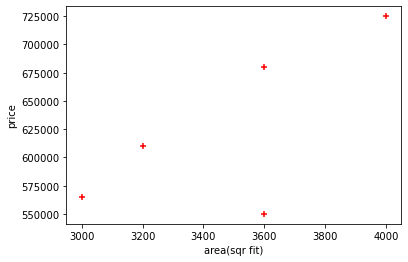

In [3]:
%matplotlib inline
plt.xlabel("area(sqr fit)")
plt.ylabel("price")
plt.scatter(df.area,df.price,color="red",marker="+")

In [4]:
reg=linear_model.LinearRegression()
reg.fit(df[["area"]],df.price)

LinearRegression()

In [5]:
reg.predict([[3300]])

array([601546.05263158])

In [6]:
reg.coef_

array([135.85526316])

In [7]:
reg.intercept_

153223.68421052652

In [8]:
val=reg.coef_*3300+reg.intercept_
val

array([601546.05263158])

In [13]:
df=pd.read_csv("info.csv")
df.head(3)


,area
0,2342424
1,2424242
2,4353224


In [14]:
prices=reg.predict(df)
df["price"]=prices

In [15]:
df.to_csv("prediction.csv")

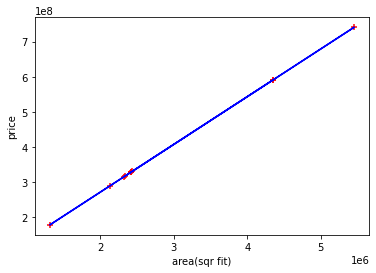

In [16]:
%matplotlib inline
plt.xlabel("area(sqr fit)")
plt.ylabel("price")
plt.scatter(df.area,df.price,color="red",marker="+")
plt.plot(df.area,reg.predict(df[["area"]]),color="blue")

In [17]:
new_df=pd.read_csv("per_capita.csv")
new_df.head(3)

,year,per_capita_income
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484


In [21]:
model=linear_model.LinearRegression()
model.fit(new_df[["year"]],new_df.per_capita_income)

# reg.predict([[2020]])

LinearRegression()

In [22]:
model.predict([[2020]])

array([41288.69409442])

In [23]:
import pickle
with open("model_pickle","wb")as f:
    pickle.dump(model,f)

In [24]:
with open("model_pickle","rb")as f:
    mp=pickle.load(f)

In [28]:
mp.predict([[2020]])

array([41288.69409442])

In [30]:
mp.intercept_

-1632210.7578554575

In [42]:
import sklearn.externals
import joblib

In [43]:
joblib.dump(model,"model_joblib")

['model_joblib']

In [44]:
mj=joblib.load("model_joblib")
mj.predict([[2020]])

array([41288.69409442])